## HealthCare Insurance

## Description

Insurance companies need to set the insurance premiums following the population trends despite having limited information about the insured population if they have to put themselves in a position to make profits. This makes it necessary to estimate the average medical care expenses based on trends in the population segments, such as smokers, drivers, etc. To implement this regression project example, you can use the Medical Cost Personal Datasets attached to this task. The aim here will be to predict the medical costs billed by health insurance on an individual given some or all of the independent variables of the dataset. Since the cost to be predicted is a continuous variable, it is pretty natural that regression is to be applied in its truest form (i.e., without the decision boundary as in regression-based classification). Therefore, you could choose to implement polynomial, multiple linear regression, or even Elastic Net Regression. Exploratory data analysis can be an essential step (even in this case despite the limited features). You will observe patterns, like the decreased tendency to smoke among those having children, helping you achieve reasonable feature selection and simpler models.

**Pre-requisites:** Python, Scikit-learn and Pandas

**Call to action:** Train a linear regression model to predict the Medical cost of the person.

#### Details about the features:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance"

### Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the csv file 
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
def missing_values_table(df):
    # Find the total null values that are present in each column
    mis_val = df.isnull().sum()
    
    #percentage of missing values 
    mis_val_percent = 100*df.isnull().sum() /len(df)
    
    #make a table with the results 
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis=1)
    
    #rename the column
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: "missing values", 1:"% of total values"})
    
    #sort the table by percentage  of missing values descending 
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    "% of total values", ascending=False).round(1)
    
    #print some summary information
    print("your selected dataframe has"+str(df.shape[1])+"colunms.\n"
        "there are" + str(mis_val_table_ren_columns.shape[0])+"colums that have missing values")
    
    #return the Dataframe with missing information
    return mis_val_table_ren_columns

missing = missing_values_table(df)
missing 

your selected dataframe has7colunms.
there are0colums that have missing values


,missing values,% of total values


### EDA 

#### correlation between age and charges (Univariate EDA)

This are the ages and the mean of thair insurance cost according to our Dataset


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'charges')

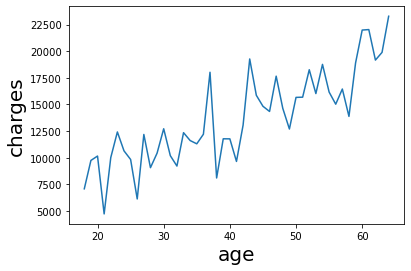

In [6]:
limit_mean = df.groupby("age")["charges"].mean()

print("This are the ages and the mean of thair insurance cost according to our Dataset")
limit_mean = limit_mean.values.reshape(1,-1)
age = df["age"].tolist()
age.sort()
age = list(set(age))
mean_data = df.groupby("age")["charges"].mean().tolist()

sns.lineplot(age, mean_data)
plt.xlabel("age",fontsize = 20)
plt.ylabel("charges", fontsize = 20)

#### smoking and price (Multivariate EDA)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Smoker Distribution')

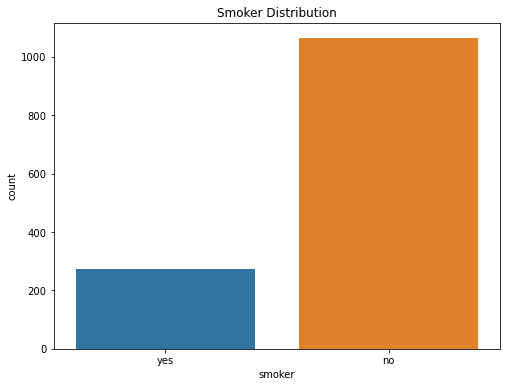

In [7]:
plt.figure(figsize=(8,6))
sns.countplot("smoker",data = df)
plt.title("Smoker Distribution")

In [8]:
groupby_sex_smoker = pd.DataFrame(df.groupby(['sex','smoker'])['charges'].agg([np.mean,np.std]))
groupby_sex_smoker.style.background_gradient(cmap='Pastel2_r')

#### Region and price

<Figure size 720x504 with 0 Axes>

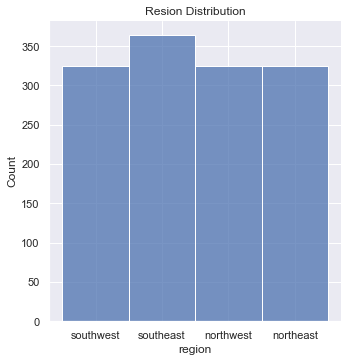

In [9]:
sns.set()
plt.figure(figsize=(10,7))
sns.displot(df['region'])
plt.title("Resion Distribution")
plt.show()

In [10]:
groupby_sex_smoker = pd.DataFrame(df.groupby(['sex','region'])['charges'].agg([np.mean,np.std]))
groupby_sex_smoker.style.background_gradient(cmap='Pastel2_r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Children Disribution')

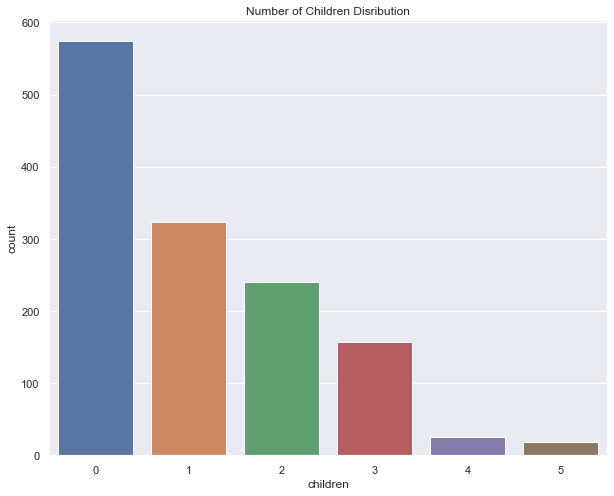

In [11]:
plt.figure(figsize=(10,8))
sns.countplot("children",data = df)
plt.title("Number of Children Disribution")

In [12]:
groupby_sex_smoker = pd.DataFrame(df.groupby(['sex','children'])['charges'].agg([np.mean,np.std]))
groupby_sex_smoker.style.background_gradient(cmap='Pastel2_r')

In [13]:
# Check all values of the Discreate column for reference to dictionary
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [14]:
# Make Dictionary referance to convert Discreate values to Continuous as to add more
sex_dictionary = {"male":1,"female":0}

smoker_dictionary = {"yes":1,"no":0}

region_dictionary = {"northeast":0,"northwest":1,"southeast":2,"southwest":3}

# map the dictionary into the dataframe
df["sex"]=df["sex"].map(sex_dictionary)
df["smoker"]=df["smoker"].map(smoker_dictionary)
df["region"]=df["region"].map(region_dictionary)

#### Show EDA Multivariate using pairplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

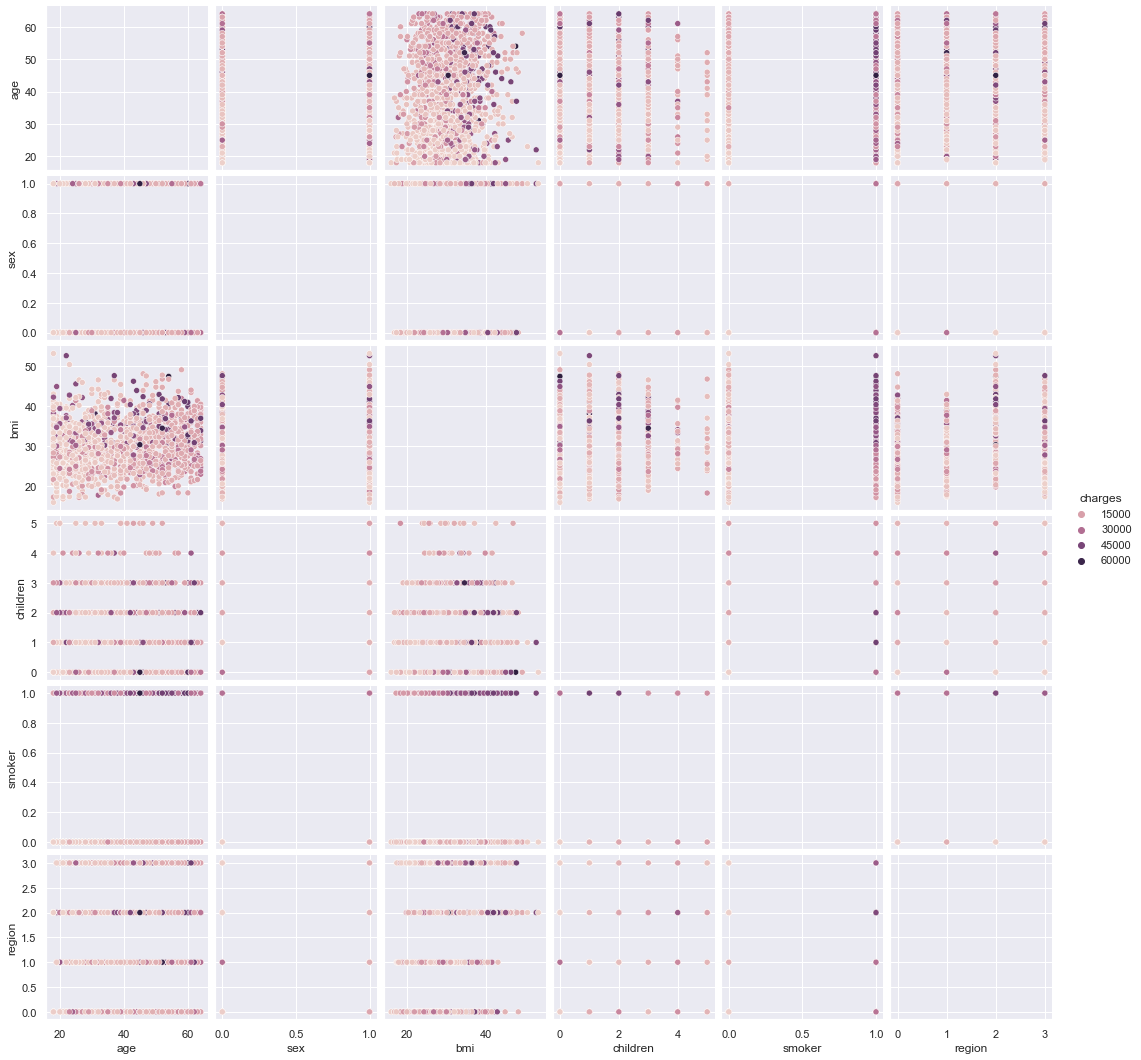

In [15]:
sns.pairplot(data=df, hue= "charges")
plt.show()

#### Heatmap

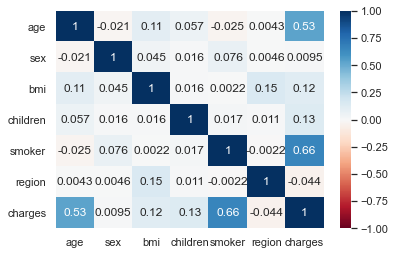

In [16]:
# show correlation strength between variables using heatmap
sns.heatmap(df.corr(method="spearman"),vmax=1, vmin=-1, cmap='RdBu', annot=True)
plt.show()

In [17]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### Box plot

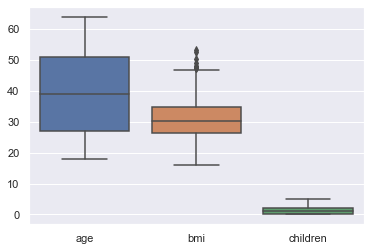

In [18]:
sns.boxplot(data=df[["age","bmi","children"]])
plt.show()

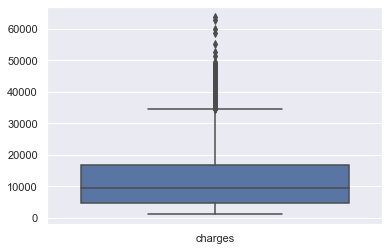

In [19]:
sns.boxplot(data=df[["charges"]])
plt.show()

### Split the dataset into training data and testing data

In [20]:
# Independent Variables
X = df[["age","sex","bmi","children","smoker","region"]]
#Dependent Variable
y = df["charges"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the model for regression equation based on the datset

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
result = LinearRegression()
result.fit(X_train.values, y_train)

LinearRegression()

In [24]:
print("Intercept:",format(result.intercept_))
print("Coefficient for the age of the Dataset:",format(result.coef_[0]))
print("Coefficient for the sex of the Dataset:",format(result.coef_[1]))
print("Coefficient for the bmi of the Dataset:",format(result.coef_[2]))
print("Coefficient for the children of the Dataset:",format(result.coef_[3]))
print("Coefficient for the smoker of the Dataset:",format(result.coef_[4]))
print("Coefficient for the region of the Dataset:",format(result.coef_[4]))

Intercept: -11946.606567263038
Coefficient for the age of the Dataset: 257.05626364441554
Coefficient for the sex of the Dataset: -18.791456698893185
Coefficient for the bmi of the Dataset: 335.78149099435694
Coefficient for the children of the Dataset: 425.0914559529473
Coefficient for the smoker of the Dataset: 23647.818096084575
Coefficient for the region of the Dataset: 23647.818096084575


### Summary of the model

In [25]:
import statsmodels.api as sm

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 17 Jul 2023   Prob (F-statistic):          2.71e-308
Time:                        03:58:53   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10.991      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
